# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('demo01_tratada.csv', sep=',', encoding='utf-8-sig')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   sexo                                    16650 non-null  int64  
 1   posse_de_veiculo                        16650 non-null  int64  
 2   posse_de_imovel                         16650 non-null  int64  
 3   qtd_filhos                              16650 non-null  int64  
 4   idade                                   16650 non-null  float64
 5   tempo_emprego                           16650 non-null  float64
 6   possui_celular                          16650 non-null  int64  
 7   possui_fone_comercial                   16650 non-null  int64  
 8   possui_fone                             16650 non-null  int64  
 9   possui_email                            16650 non-null  int64  
 10  qt_pessoas_residencia                   16650 non-null  fl

In [5]:
df.isna().sum()

sexo                                      0
posse_de_veiculo                          0
posse_de_imovel                           0
qtd_filhos                                0
idade                                     0
tempo_emprego                             0
possui_celular                            0
possui_fone_comercial                     0
possui_fone                               0
possui_email                              0
qt_pessoas_residencia                     0
mau                                       0
tipo_renda_Commercial associate           0
tipo_renda_Pensioner                      0
tipo_renda_State servant                  0
tipo_renda_Student                        0
tipo_renda_Working                        0
educacao_Academic degree                  0
educacao_Higher education                 0
educacao_Incomplete higher                0
educacao_Lower secondary                  0
educacao_Secondary / secondary special    0
estado_civil_Civil marriage     

In [3]:
y = df['mau']
x = df.drop('mau', axis=1)

In [27]:
# Separando base de treino e base de teste
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [33]:
clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(x_train, y_train)

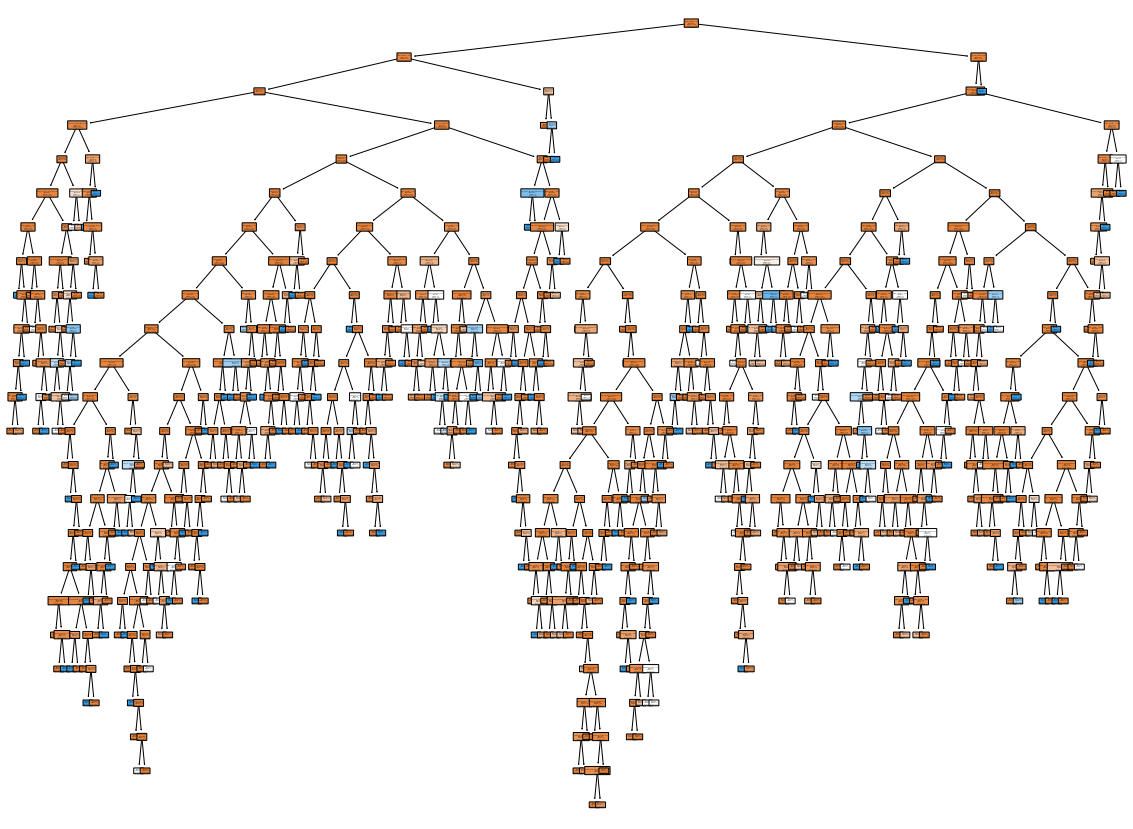

In [34]:
# Arvore de decisão
plt.figure(figsize=(20,15))
plot_tree(clf, filled=True, 
          class_names=['reprovado', 'aprovado'], 
          feature_names = x.columns,
          rounded=True      
         );


C:\Users\HenriqueCampos\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


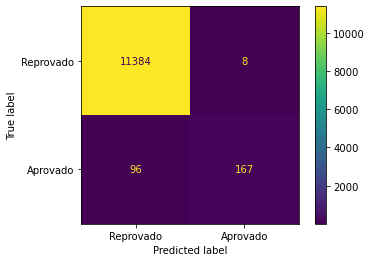

In [39]:
# Matriz confusão
plot_confusion_matrix(clf, x_train, y_train, display_labels=['Reprovado', 'Aprovado']);

In [35]:
# Acurácia na base de treinamento
predict = clf.predict(x_train)
accuracy_score(y_train, predict)  # Não é uma boa prática fazer isso na base de treinamento, mas como foi pedido está aí

0.991076791076791

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [37]:
y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9685685685685685

O valor de acurácia obtido é bastante elevado, o que pode indicar que o modelo esteja em overfitting

C:\Users\HenriqueCampos\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


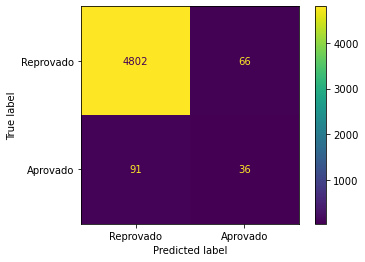

In [42]:
# Matriz confusão para a base teste
# Matriz confusão
plot_confusion_matrix(clf, x_test, y_test, display_labels=['Reprovado', 'Aprovado']);

In [43]:
accuracy_score(y_test, y_pred)

0.9685685685685685

In [68]:
# Novo Treino
clf = DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)
clf = clf.fit(x_train, y_train)
nova_pred = clf.predict(x_test)
print(f'Acurácia: {accuracy_score(y_test, nova_pred)}')
print(f'Valores maus: {nova_pred.sum()}')

Acurácia: 0.9727727727727727
Valores maus: 31


In [70]:
# Novo Treino
y_train_ones = np.ones_like(y_train)
clf = DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)
clf = clf.fit(x_train, y_train_ones)
nova_pred = clf.predict(x_test)
print(f' Acurácia com valores de y_train iguais a 1: {accuracy_score(y_test, nova_pred)}')

 Acurácia com valores de y_train iguais a 1: 0.025425425425425426
